In [1]:
import numpy as np
from matplotlib import pyplot as plt
from pycromanager import Core,Studio
import cv2
import pickle
import os
from time import sleep
    

In [2]:

core=Core()
def snap_image():
    core=Core()
    # acquire an image and display it
    core.snap_image()
    tagged_image = core.get_tagged_image()
    # get the pixels in numpy array and reshape it according to its height and width
    image_array = np.reshape(
        tagged_image.pix,
        newshape=[-1, tagged_image.tags["Height"], tagged_image.tags["Width"]],
    )
    # return the first channel if multiple exists
    return image_array[0, :, :]

In [3]:
experiment_name='new_lamp_comparison'
filelocation="Y:\Julian\Lamp_tests"
location=filelocation+"\\"+experiment_name
os.mkdir(location)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'Y:\\Julian\\Lamp_tests\\new_lamp_comparison'

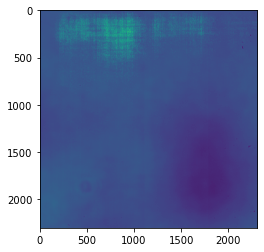

In [9]:

core.set_exposure(10^-5)
img_1=snap_image()

plt.imshow(img_1)


In [14]:
np.save(location+"\\small_lamp", img_1)

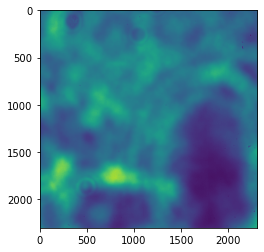

In [10]:
sleep(20)

core.set_exposure(10^-5)
img_2=snap_image()
#np.save(location+"\\big_lamp", img_2)
plt.imshow(img_2)

In [15]:
np.save(location+"\\big_lamp", img_2)

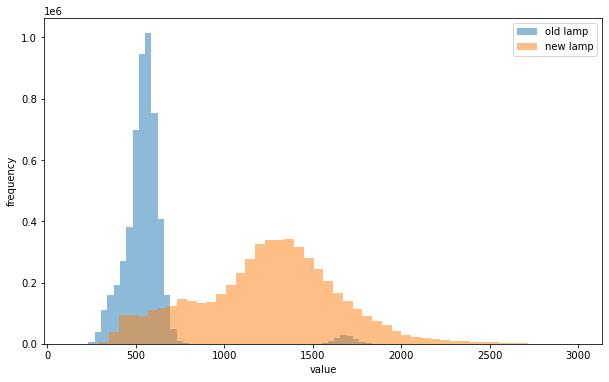

In [11]:
import numpy as np
import matplotlib.pyplot as plt
data=[img_1.flatten(),img_2.flatten()]
# Take the log of the data
log_data = [d for d in data]

# Now, let's plot the histogram
plt.figure(figsize=(10, 6))
name_list=["old lamp", "new lamp"]
for i, d in enumerate(log_data):
    plt.hist(d, bins=50, alpha=0.5, label=name_list[i])

plt.legend(loc='upper right')
plt.xlabel("value")
plt.ylabel("frequency")
plt.show()



In [12]:
np.mean(img_1)

558.6937700436439

In [13]:
np.mean(img_2)

1241.064811800733